# 自定义线性模型 - 1

## 1. 导入包，并启用eager executing

前端语言Python和后端语言C，启用eager executing之后，方便开发

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 启用eager executing
tf.enable_eager_execution()

## 2. 定义两个变量W,  b

- W: weights(权重)， keras中叫kernel
- b: bias(偏差)

$线性方程： y=x * W + b $

In [2]:
W = tf.Variable(0.0)
b = tf.Variable(0.0)

## 3. 准备样本数据

In [3]:
TRUE_W = 4.0
TRUE_b = 5.0
NUM_EXAMPLES = 1000
learning_rate = 0.1

x  = tf.random_normal(shape=[NUM_EXAMPLES])
noise = tf.random_normal(shape=[NUM_EXAMPLES])
y = x * TRUE_W + TRUE_b + noise

## 4. 图形显示样本分布

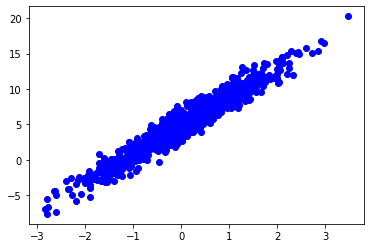

In [4]:
plt.scatter(x, y, c='b')
plt.show()

## 5. 简单配置

In [5]:
# 总迭代次数
epochs = 20

# 保存迭代过程中W值，以供画图使用
W_list = []
# 保存迭代过程中b值，以供画图使用
b_list = []
# 保存迭代过程中loss值，以供画图使用
loss_list = []

## 6. 通过迭代训练模型

In [6]:
for epoch in range(epochs):
    # 自动微分
    with tf.GradientTape() as t:
        # 定义模型
        x_predication = x * W + b
        # 计算损失函数
        loss = tf.reduce_mean(tf.square(x_predication - y))

    # 分别计算W, b梯度
    W_gradient,b_gradient = t.gradient(loss, [W, b])
    
    # 保存迭代过程中的W值
    W_list.append(W.numpy())
    # 保存迭代过程中的b值
    b_list.append(b.numpy())
    # 保存损失值，后面画图用
    loss_list.append(loss)
    
    # 对W，b重新赋值，以供下次迭代使用
    W.assign_sub(learning_rate * W_gradient)
    b.assign_sub(learning_rate * b_gradient)
    
    # 显示当前 W, b以及loss值
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, W_list[-1], b_list[-1], loss))



Epoch  0: W=0.00 b=0.00, loss=42.78722
Epoch  1: W=0.82 b=1.02, loss=27.41386
Epoch  2: W=1.48 b=1.82, loss=17.69911
Epoch  3: W=2.00 b=2.47, loss=11.56012
Epoch  4: W=2.42 b=2.97, loss=7.68072
Epoch  5: W=2.75 b=3.38, loss=5.22921
Epoch  6: W=3.01 b=3.70, loss=3.68002
Epoch  7: W=3.22 b=3.96, loss=2.70102
Epoch  8: W=3.39 b=4.16, loss=2.08236
Epoch  9: W=3.52 b=4.32, loss=1.69139
Epoch 10: W=3.63 b=4.45, loss=1.44432
Epoch 11: W=3.71 b=4.55, loss=1.28818
Epoch 12: W=3.78 b=4.63, loss=1.18951
Epoch 13: W=3.83 b=4.69, loss=1.12715
Epoch 14: W=3.88 b=4.74, loss=1.08775
Epoch 15: W=3.91 b=4.78, loss=1.06284
Epoch 16: W=3.94 b=4.82, loss=1.04710
Epoch 17: W=3.96 b=4.84, loss=1.03716
Epoch 18: W=3.97 b=4.86, loss=1.03087
Epoch 19: W=3.99 b=4.88, loss=1.02690


## 7. 图形显示迭代过程值的变化

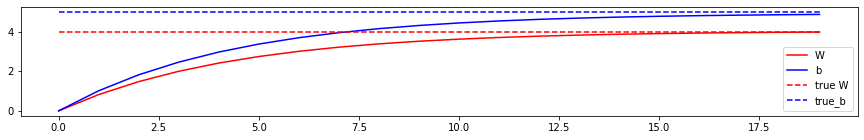

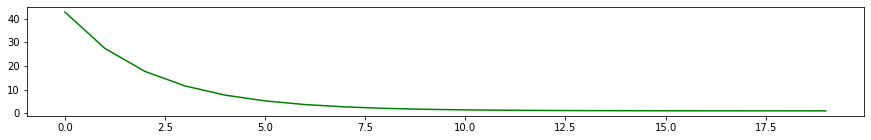

In [7]:
plt.figure(figsize=(15, 2))
plt.plot(range(epochs), W_list, 'r', range(epochs), b_list, 'b')
plt.plot([TRUE_W] * epochs, 'r--', [TRUE_b] * epochs, 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])

plt.figure(figsize=(15, 2))
plt.plot(range(epochs), loss_list, 'g')

plt.show()
